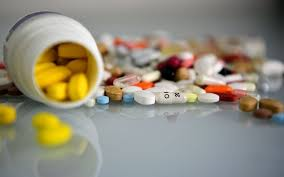

# Objective of This Notebook and Explanation of the Columns


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Importing the data within our notebook
row_data = pd.read_csv("drug200.csv")
row_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'drug200.csv'

In [ ]:
row_data.info()

In [ ]:
row_data.describe()

In [ ]:
print(row_data["Sex"].unique())
print(row_data["BP"].unique())
print(row_data["Cholesterol"].unique())
print(row_data["Drug"].unique())

In [ ]:
row_data.replace("DrugY", "drugY", inplace=True)
print(row_data["Drug"].unique())

## Observation of  the Numerical Columns

### Numerical Ones

In [ ]:
sns.boxplot(data=row_data, x="Age")

In [ ]:
sns.displot(row_data, x="Age", binwidth=3)

In [ ]:
sns.boxplot(data=row_data, x="Na_to_K")

In [ ]:
sns.displot(row_data, x="Na_to_K", binwidth=3)

As we see people's age distribution seems like bell-shaped whereas Na_to_K seems right-skewed.And this phenomenon gets supported by the box plots and row_data.describe() section.

### Categorical Ones

In [ ]:
sns.countplot(data=row_data, x="Sex")

In [ ]:
sns.countplot(data=row_data, x="BP", hue="Sex")

In [ ]:
sns.countplot(data=row_data, x="Drug", hue="Sex")

In [ ]:
sns.countplot(data=row_data, x="Cholesterol", hue="Sex")

-Number of men greater than number of women.
-Patients mostly have high BP.
-drugY is the most used drug type among the other ones.
-Patients mostly have high Cholesterol.

### Categorical-Numerical Ones

In [ ]:
sns.catplot(data=row_data, x="Sex", y="Age", kind="box")

In [ ]:
sns.catplot(data=row_data, x="Sex", y="Na_to_K", kind="box")

-Generally speaking,females' Na_to_K ratio is greater than males' ones.

In [ ]:
sns.catplot(data=row_data, x="BP", y="Age", hue="Sex", kind="box")

In [ ]:
sns.catplot(data=row_data, x="BP", y="Na_to_K", hue="Sex", kind="box")

In [ ]:
sns.catplot(data=row_data, x="Drug", y="Age", hue="Sex", kind="box")

In [ ]:
sns.catplot(data=row_data, x="Drug", y="Na_to_K", hue="Sex", kind="box")

In [ ]:
sns.catplot(data=row_data, x="Cholesterol", y="Age", hue="Sex", kind="box")

In [ ]:
sns.catplot(data=row_data, x="Cholesterol", y="Na_to_K", hue="Sex", kind="box")

## Modelling Part

In [ ]:
# Here X will be the DataFrame that contains predictors whereas y will be the target.
X = row_data.drop(["Drug"], axis=1)
y = row_data["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Since I want to see the effect of categorical variables on predicting the drug type,I must convert those
# categorical variables into numerical ones.
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
X_test.head()

In [ ]:
# Let's see correlation of the predictors.

plt.figure(figsize=(16,8))

sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)

plt.show()

#### Logistic Regression

First we will begin with Logistic Regression model to predict drug type based on some variables.


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', max_iter=5000)
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

Here we got an idea about performance of our classification model.
But high accuracy_score does not mean we have a nice model.Because of this reason we need better metrics to measure our performance of classification model.

In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=row_data["Drug"].unique())

cm_df = pd.DataFrame(cm)

cm_df



In [ ]:
row_data["Drug"].unique()